<h1><b>Categorical Variable and One Hot Encoding</b></h1>

In [45]:
import pandas as pd
df = pd.read_csv('homeprices.csv')
df.head(10)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


<h2><b>Using pandas to create dummy variable</b></h2>

In [46]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [47]:
df1 = pd.concat([df, dummies], axis='columns' )
df1

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [48]:
df1.drop('town', axis='columns', inplace=True)
df1

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


Dummy Variable Trap<br>
When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

NOTE:<br> sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you

In [49]:
df1.drop('west windsor', axis='columns', inplace=True)
df1

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [50]:
X = df1.drop('price', axis='columns')
y = df1.price

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [52]:
model.predict(X)

array([ 539709.7398409 ,  590468.71640508,  615848.20468716,
        666607.18125134,  717366.15781551,  579723.71533005,
        605103.20361213,  668551.92431735,  706621.15674048,
        565396.15136531,  603465.38378844,  628844.87207052,
        692293.59277574])

In [53]:
model.score(X, y)

0.95739290372218733

In [55]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

array([ 681241.66845839])

In [57]:
model.predict([[2800,0,1]]) #2800 sqr ft home in robbinsville

array([ 590775.63964739])

<h2><b>Using sklearn OneHotEncoder<b/></h2>

First step is to convert town names into numbers using label encoder

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [60]:
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [63]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [76]:
X = dfle[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [77]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

Now use one hot encoder to create dummy variables for each pf the towns.

In [78]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])

In [79]:
X = ohe.fit_transform(X).toarray()
X

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.60000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.20000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.60000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.00000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.60000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.80000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.30000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.60000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.60000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.90000000e+03],
       [  0.00000000e

In [80]:
X = X[:,1:]

In [81]:
X

array([[  0.00000000e+00,   0.00000000e+00,   2.60000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   3.00000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   3.20000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   3.60000000e+03],
       [  0.00000000e+00,   0.00000000e+00,   4.00000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   2.60000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   2.80000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   3.30000000e+03],
       [  0.00000000e+00,   1.00000000e+00,   3.60000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   2.60000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   2.90000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   3.10000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   3.60000000e+03]])

In [82]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
model.predict([[0,1,3400]])  # 3400 sqr ft home in west windsor

array([ 681241.6684584])

In [84]:
model.predict([[1,0,2800]])  # 2800 sqr ft home in west windsor

array([ 590775.63964739])

<h2><b>Exercise</b></h2>

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000<br>

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000<br>

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())<br>

<h3><b>Using sklearn OneHotEncoder</b></h3>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
df = pd.read_csv('carprices1.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


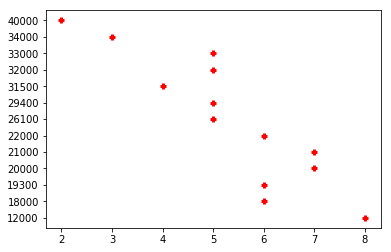

In [144]:
plt.scatter(df[['Age(yrs)']], df[['Sell Price($)']], color='red', marker='+', linewidth='3')

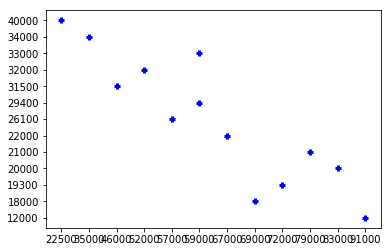

In [143]:
plt.scatter(df[['Mileage']], df[['Sell Price($)']], color='blue', marker='+', linewidth='3')

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [109]:
dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [119]:
X = dfle[['Car Model', 'Mileage', 'Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [120]:
y = dfle['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [110]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])

In [123]:
X = ohe.fit_transform(X).toarray()
X

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          6.90000000e+04,   6.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.50000000e+04,   3.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          5.70000000e+04,   5.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.25000000e+04,   2.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          4.60000000e+04,   4.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.90000000e+04,   5.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.20000000e+04,   5.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          7.20000000e+04,   6.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          9.10000000e+04,   8.00000000e+00],
       [  0.00000000e+00,   0.0000000

In [124]:
X = X[:,1:]
X

array([[  1.00000000e+00,   0.00000000e+00,   6.90000000e+04,
          6.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   3.50000000e+04,
          3.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   5.70000000e+04,
          5.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   2.25000000e+04,
          2.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   4.60000000e+04,
          4.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   5.90000000e+04,
          5.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   5.20000000e+04,
          5.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   7.20000000e+04,
          6.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   9.10000000e+04,
          8.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   6.70000000e+04,
          6.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   8.30000000e+04,
          7.00000000e+00],
       [  0.00000000e

In [127]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [128]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
lreg.coef_

array([ -4.28466659e+03,   2.45354074e+03,  -3.70122094e-01,
        -1.33245363e+03])

In [130]:
lreg.intercept_

56523.085231287012

In [138]:
lreg.predict([[0,1,45000,4]]) # Price of mercedez benz that is 4 yr old with mileage 45000

array([ 36991.31721062])

In [137]:
lreg.predict([[1,0,86000,7]]) # Price of BMW X5 that is 7 yr old with mileage 86000

array([ 11080.74313219])

In [136]:
lreg.score(X, y)

0.94170509372810818

<h3><b>Using pandas get_dummies</b></h3>

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [148]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [161]:
merged = pd.concat([df, dummies], axis='columns')

In [163]:
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [164]:
X = final.drop(['Sell Price($)'], axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [167]:
y = final[['Sell Price($)']]
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [168]:
from sklearn.linear_model import LinearRegression 
lreg = LinearRegression()

In [169]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
lreg.coef_

array([[ -3.70122094e-01,  -1.33245363e+03,  -2.45354074e+03,
         -6.73820733e+03]])

In [171]:
lreg.intercept_

array([ 58976.62596854])

In [174]:
lreg.predict([[45000,4,0,0]])

array([[ 36991.31721061]])

In [175]:
lreg.predict([[86000,7,0,1]])

array([[ 11080.74313219]])

In [176]:
lreg.score(X, y)

0.94170509372810818